In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.interpolate import BarycentricInterpolator
from numpy import sin, cos, pi
import matplotlib.pyplot as plt

In [2]:
## Parameters

# limb lengths
l_1, l_2 = 1, 1

# limb masses
m_1, m_2 = 1, 1

# body mass
m_A = 1

# gravity
g = 9.81

# joint stiffnesses
k_B = 1

# joint damping
b_B = 1

# joint neutral angles
psi_B = pi/12

# Walking speed
v = 1

In [3]:
# Made-up data
n = 30 # keep below 30 for stability
t_array = np.linspace(0, 10, n)
y_array = 0.1 * cos(pi * t_array)
theta_1_array = sin(pi * t_array)

In [4]:
y_interp = BarycentricInterpolator(t_array, y_array)
theta_1_interp = BarycentricInterpolator(t_array, theta_1_array)

In [5]:
# interpolation functions
def a_func(t):
    return y_interp.derivative(t, 2)

def theta_1_func(t):
    return theta_1_interp(t)

def omega_1_func(t):
    return theta_1_interp.derivative(t, 1)

def alpha_1_func(t):
    return theta_1_interp.derivative(t, 2)

In [6]:
def swing(t, state):
    # determine input values
    a = a_func(t)
    theta_1 = theta_1_func(t)
    omega_1 = omega_1_func(t)
    alpha_1 = alpha_1_func(t)

    # unpack state
    theta_2 = state[0]
    omega_2 = state[1]

    # calculate derivatives with EOMs
    alpha_2 = 3*b_B*omega_1/(l_2**2*m_2) - 3*b_B*omega_2/(l_2**2*m_2) - 3*g*sin(theta_2)/(2*l_2) - 3*k_B*psi_B/(l_2**2*m_2) + 3*k_B*theta_1/(l_2**2*m_2) - 3*k_B*theta_2/(l_2**2*m_2) + 3*l_1*sin(theta_1 - theta_2)*omega_1**2/(2*l_2) - 3*l_1*cos(theta_1 - theta_2)*alpha_1/(2*l_2) - 3*sin(theta_2)*a/(2*l_2)

    # Pack derivatives into array and return
    return np.array((omega_2, alpha_2))


In [7]:
# Initial conditions
theta_2_0 = 1
omega_2_0 = 0

state0 = np.array([theta_2_0, omega_2_0])

In [8]:
t_span = (t_array[0], t_array[-1])
t_eval = np.linspace(*t_span, 1000)
solution = solve_ivp(swing, t_span, state0, t_eval=t_eval)

In [9]:
t = solution.t
state = solution.y
theta_2 = state[0, :]
omega_2 = state[0, :]

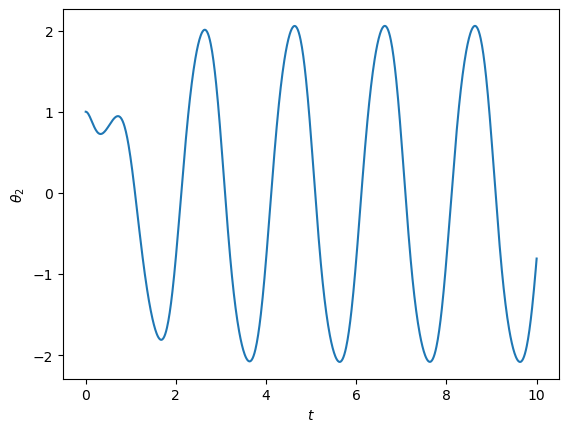

In [10]:
plt.plot(t, theta_2)
plt.xlabel(r'$t$')
plt.ylabel(r'$\theta_2$')
plt.show()